### 导入需要用到的库
- 执行magic命令'%matplotlib inline'后，绘图将直接呈现在notebook中
- 导入matplotlib.pyplot和numpy两个库

In [1]:
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np

### 1. 一个简单的例子

In [2]:
x = np.linspace(-10,10,100)

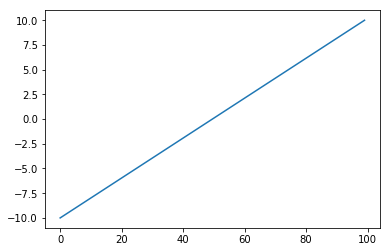

In [3]:
pl.plot(x)

### 2. plot(x_data,y_data,**properties)

**plot函数的调用方式很灵活，第一句将x,y数组传递给plot之后(*也可以只提供y，此时x为np.arange(len(y))*)，用关键字参数指定各种属性:**

- label : 给所绘制的曲线一个名字，此名字在图示(legend)中显示。只要在字符串前后添加\$符号，matplotlib就会使用其内嵌的latex引擎绘制的数学公式。
- color或c: 指定曲线的颜色，可以为人意matplot规定的颜色，如['k' | 'm' | 'r' | 'g' | 'c' | ...]
- linewidth或lw: 指定曲线的宽度，可以为正数
- linestyle或ls: 指定曲线的样式，可以为['-' | '--' | '-.' | ':' | 'steps' | ...]
- alpha: 指定曲线的透明度，取值为0～1
- marker: 曲线的标记，取值为[ '+' | ',' | '.' | '1' | '2' | '3' | '4'|... ]
- markeredgecolor或mec: 曲线标记边缘颜色
- markeredgewidth或mew: 曲线标记的宽度
- markerfacecolor或mfc: 曲线标记填充颜色
- markersize或ms: 标记的大小
- ...

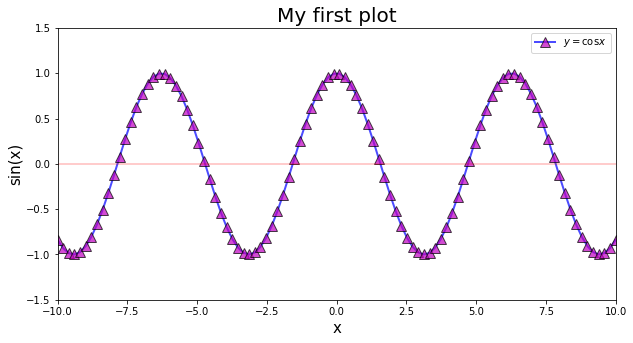

In [5]:
pl.figure(figsize=(10,5))
pl.plot(x, np.cos(x), c='b',ls='-',marker='^',ms=10,mec='k',mew = 1,mfc = 'm',lw=2,alpha=0.7,label='$y=\cos x$')
pl.plot(x, np.zeros_like(x),c='r',lw=2,alpha=0.2)
pl.xlim([-10,10])
pl.ylim([-1.5,1.5])
pl.xlabel('x',fontsize=15)
pl.ylabel('sin(x)',fontsize=15)
pl.title('My first plot',fontsize=20)
pl.legend(loc='best')

当使用pl.plot将返回一个关于*matplotlib.lines.Line2D*列表，例如:
```python
line1, line2 = pl.plot(x1, y1, x2, y2)
```
得到两个Line2D对象。

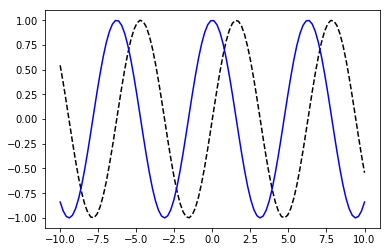

In [6]:
line1,line2 = pl.plot(x,np.sin(x),'k--',x,np.cos(x),'b-')

In [47]:
line1

**设置曲线的属性**
```python
pl.setp(曲线名称, **关键属性)
```

[None, None, None, None, None]

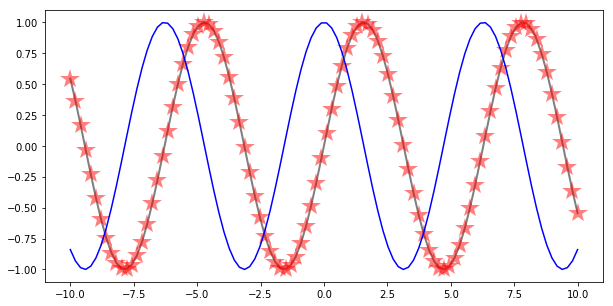

In [7]:
pl.figure(figsize=(10,5))
line1,line2 = pl.plot(x,np.sin(x),x,np.cos(x),'b-')
pl.setp(line1,c='k',alpha=0.5,lw=2)
pl.setp(line1,marker='*',ms=20,mec='k',mew=0,mfc='r')

### 3. scatter(x,y,**properties)

```python
pl.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
```
- x,y: 所要绘制marker的x和y坐标值，为数组
- s: marker的大小，为一个数组
- c: marker的颜色，为一个数组
- cmap: colormap
- alpha: marker的透明度
- edgecolors: marker边缘的颜色
- ...

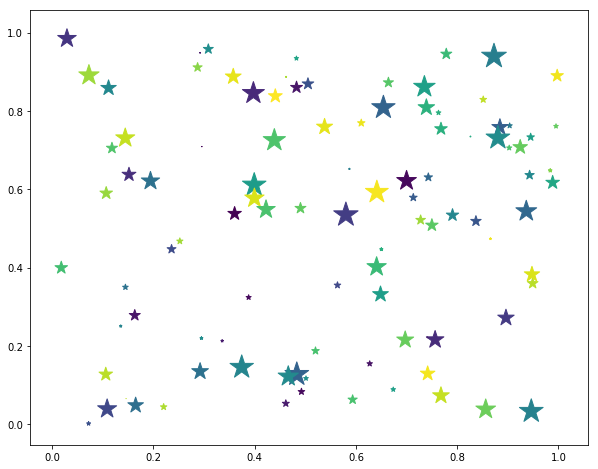

In [8]:
N = 100
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

pl.figure(figsize=(10,8))
pl.scatter(x, y, marker = '*', s=area, c=colors, alpha=1)

### 4. 多个图

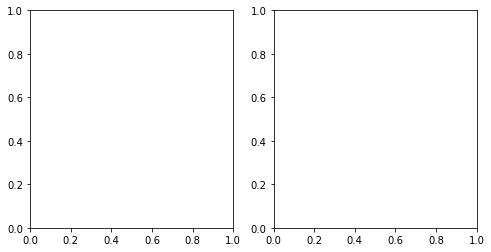

In [83]:
pl.figure(figsize=(8,4))                
pl.subplot(121) #或者pl.subplot(1,2,1)
pl.subplot(122)

<bound method Figure.tight_layout of <matplotlib.figure.Figure object at 0x11cd04410>>

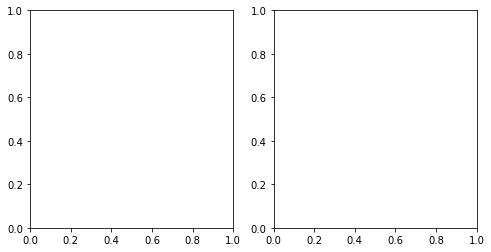

In [79]:
fig, (ax0, ax1) = pl.subplots(ncols=2, figsize=(8, 4))

<bound method Figure.tight_layout of <matplotlib.figure.Figure object at 0x11d2876d0>>

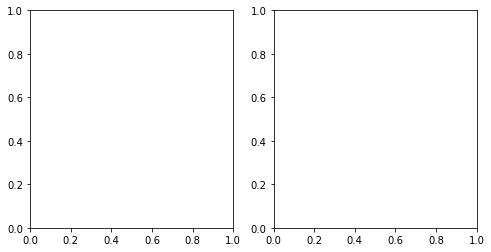

In [80]:
fig = pl.figure(figsize=(8, 4))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

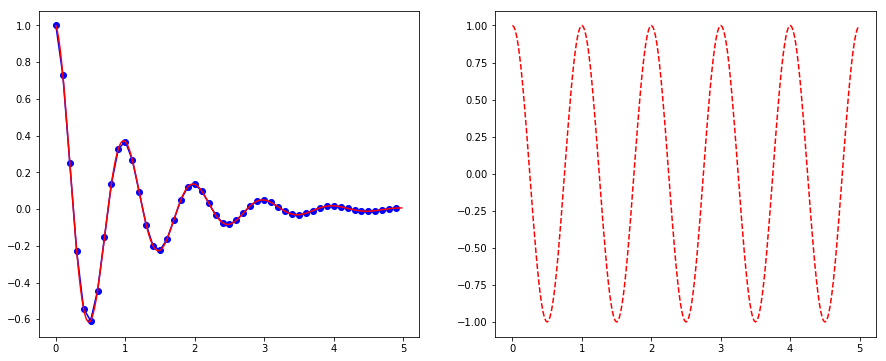

In [9]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

fig = pl.figure(figsize=(15,6))
#图1
ax0 = fig.add_subplot(1,2,1)
ax0.plot(t1, f(t1), 'bo-', t2, f(t2), 'r')

#图2
ax1 = fig.add_subplot(1,2,2)
ax1.plot(t2, np.cos(2*np.pi*t2), 'r--')
pl.show()

### 5. 柱状图histogram

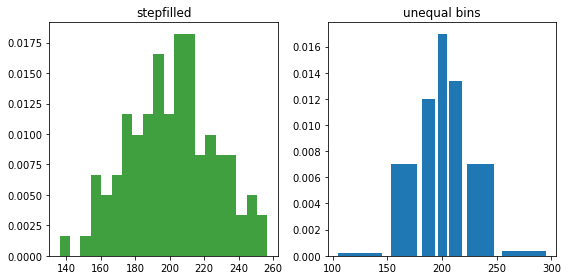

In [78]:
np.random.seed(0)

mu = 200
sigma = 25
x = np.random.normal(mu, sigma, size=100)

fig, (ax0, ax1) = pl.subplots(ncols=2, figsize=(8, 4))

ax0.hist(x, 20, normed=1, histtype='stepfilled', facecolor='g', alpha=0.75)
ax0.set_title('stepfilled')

# Create a histogram by providing the bin edges (unequally spaced).
bins = [100, 150, 180, 195, 205, 220, 250, 300]
ax1.hist(x, bins, normed=1, histtype='bar', rwidth=0.8)
ax1.set_title('unequal bins')

fig.tight_layout()

### 6. 内嵌图

([], <a list of 0 Text yticklabel objects>)

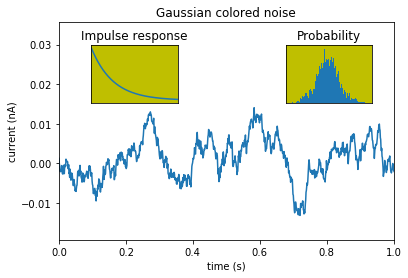

In [91]:
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000]/0.05)               # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)]*dt  # colored noise

# the main axes is subplot(111) by default
pl.plot(t, s)
pl.axis([0, 1, 1.1*np.amin(s), 2*np.amax(s)])
pl.xlabel('time (s)')
pl.ylabel('current (nA)')
pl.title('Gaussian colored noise')

# this is an inset axes over the main axes
a = pl.axes([.65, .6, .2, .2], facecolor='y')
n, bins, patches = pl.hist(s, 400, normed=1)
pl.title('Probability')
pl.xticks([])
pl.yticks([])

# this is another inset axes over the main axes
a = pl.axes([0.2, 0.6, .2, .2], facecolor='y')
pl.plot(t[:len(r)], r)
pl.title('Impulse response')
pl.xlim(0, 0.2)
pl.xticks([])
pl.yticks([])